In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [5]:
# Create a data frame only with the columns that have numeric values and categorical
numerical = df.select_dtypes(include='number')

categorical = df.select_dtypes(exclude='number')

In [6]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_open_complaints      10689 non-null  int64
 6   number_of_policies             10689 non-null  int64
 7   total_claim_amount             10689 non-null  int64
dtypes: int64(8)
memory usage: 668.2 KB


In [7]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [11]:
corr_matrix = df.corr().abs()
corr_matrix


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,0.032371,0.016789,0.232849
income,0.003732,1.000000,0.002431,0.026564,0.003846,0.018903,0.004461,0.111221
monthly_premium_auto,0.404235,0.002431,1.000000,0.010036,0.019696,0.008811,0.018805,0.630149
months_since_last_claim,0.011912,0.026564,0.010036,1.000000,0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,0.034086,1.000000,0.002554,0.009719,0.004186
number_of_open_complaints,0.032371,0.018903,0.008811,0.001204,0.002554,1.000000,0.000303,0.010668
number_of_policies,0.016789,0.004461,0.018805,0.000814,0.009719,0.000303,1.000000,0.008019
total_claim_amount,0.232849,0.111221,0.630149,0.013874,0.004186,0.010668,0.008019,1.000000


 <b> Lab Tuesday 11.04.2023 Spliting numerical values and traingn the model 
Lab Monday_10.04.2023 - Transforming categorical values (nominals and ordinals) into dummies. 



2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [14]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [15]:
from sklearn.preprocessing import OneHotEncoder 

In [16]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [17]:
# 3 Changing categorical nominals to dommies and getting rid of extra columns at the end with dorp first
import pandas as pd
nominals = pd.get_dummies(categorical, columns=['region','response','employment_status','gender','location_code','marital_status','marital_status','policy_type','sales_channel','policy','renew_offer_type','vehicle_class'], drop_first = True)

In [18]:
nominals 

,coverage,education,effective_to_date,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,2/18/11,feb,medsize,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,basic,college,1/18/11,jan,medsize,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,basic,bachelor,2/10/11,feb,medsize,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,extended,college,1/11/11,jan,medsize,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,1/17/11,jan,medsize,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,jan,medsize,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,basic,college,1/6/11,jan,medsize,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,2/6/11,feb,medsize,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,feb,medsize,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# 4 droping the colum 'effective_to_date' beacasue it is not possible to change to dumies 
nominals.drop(columns=['effective_to_date'])

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,feb,medsize,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,basic,college,jan,medsize,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,basic,bachelor,feb,medsize,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,extended,college,jan,medsize,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,jan,medsize,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,jan,medsize,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,basic,college,jan,medsize,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,feb,medsize,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10687,premium,college,feb,medsize,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
unique_coverage = categorical['coverage'].unique()
unique_coverage

array(['basic', 'extended', 'premium'], dtype=object)

In [21]:
# 5 Creating a function to replace categorical (ordinal) values 

def replacer(col_name,old_vals,new_vals):
    for i in range(len(old_vals)):
        categorical.loc[categorical[col_name] == old_vals[i], col_name] = new_vals[i]
    
    return categorical[col_name]

In [22]:
categorical.month.unique()

array(['feb', 'jan'], dtype=object)

In [23]:
categorical.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [24]:
categorical.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [25]:
# 6 creating a data frame to save the new values of the function 
ordinals = pd.DataFrame()

In [26]:
ordinals['coverage']=replacer('coverage',list(categorical.coverage.unique()), [0,1,2] )

In [27]:
ordinals['education'] = replacer('education', list(categorical.education.unique()), [1,2,0,4,3])

In [28]:
ordinals['month'] = replacer('month', list(categorical.month.unique()), [1,0])

In [29]:
ordinals['vehicle_size'] = replacer('vehicle_size', list(categorical.vehicle_size.unique()), [1,0,2])

In [30]:
ordinals

,coverage,education,month,vehicle_size
0,0,1,1,1
1,0,1,0,1
2,0,2,1,1
3,1,1,0,1
4,2,2,0,1
...,...,...,...,...
10684,2,2,0,1
10685,0,1,0,1
10686,1,2,1,1
10687,2,1,1,1


<b> Lab Tuesday 11.04.2023 Spliting numerical values and traingn the model 


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [34]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [35]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

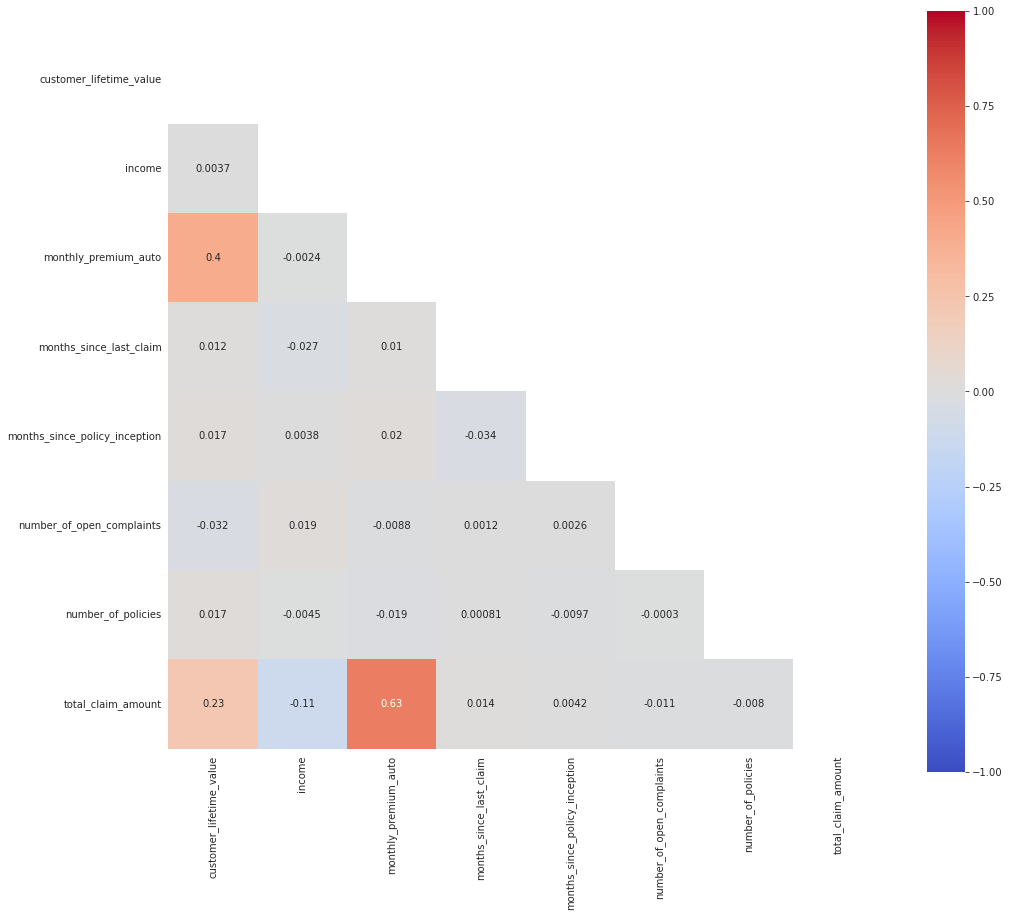

In [36]:
#plotting the correlation heatmap

corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [37]:
#removing highly correlated columns

CORR_THRESH = 0.80
corr_matrix=numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corrd_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > CORR_THRESH)]
numerical.drop(corrd_cols,axis=1,inplace=True)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

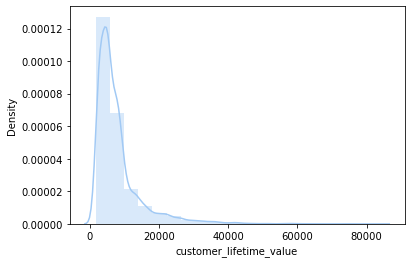

In [39]:
#distribution of clv is skewed 
sns.distplot((numerical['customer_lifetime_value']), bins=20)

In [40]:
#X,y, one-hot, and test/train

X = numerical.drop('total_claim_amount', axis=1)
y = numerical.total_claim_amount

In [41]:
X.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
dtype: bool

In [42]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [43]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [44]:
# test-train split
#tt_ratio id defined above 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=100)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
861,5908,86277,74,19,33,0,3
9053,2397,22283,65,16,93,0,1
9515,5296,96510,73,33,44,0,3


<b> continuous transformations

In [45]:
# Make the distribution more normalized
pt = PowerTransformer()


In [46]:
# Transform the x_train 
# transform data from many columns
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())

#just transform on x test
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.0s


<b> Apply the model 

In [47]:
#model fit calculate the parameters

model=LinearRegression()    # model
model.fit(X_train_ct, y_train)   # model train

LinearRegression()

In [48]:
model.coef_

array([[ -2.73008582, -33.92712089, 159.74294387,   3.30934471,
         -0.82317017,  -5.78346355,   3.30105886]])

<b> Stats model and OLS 

In [49]:
model.intercept_

array([434.8695536])

In [50]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['target_d'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_ct),columns = ['target_d'])

<b> OLS

Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.

In [51]:
import math

print('MSE:', mse(y_test,y_pred))
print('MAE:', mae(y_test,y_pred))
##prediction on the train set
print('MSE:',mse(y_train,y_pred_train))

mse = mse(y_train,y_pred_train)
print('RMSE:',math.sqrt(mse))


MSE: 59027.51412042858
MAE: 169.5695755173997
MSE: 59031.33207276332
RMSE: 242.9636435205138


In [52]:
R2=r2_score(y_test,y_pred)
R2

0.31461058986525015

In [53]:
R2_test=model.score(X_test_ct,y_test)
R2_train=model.score(X_train_ct,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.3131108318562025

In [54]:
#print('Adjusted R2: ', model.rsquared_adj)

Feature Importance.

In [55]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,159.742944
1,income,33.927121
5,number_of_open_complaints,5.783464
3,months_since_last_claim,3.309345
6,number_of_policies,3.301059
0,customer_lifetime_value,2.730086
4,months_since_policy_inception,0.823170


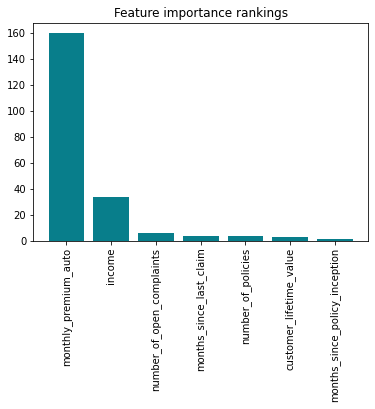

In [56]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

ValueError: Could not interpret input 'state'

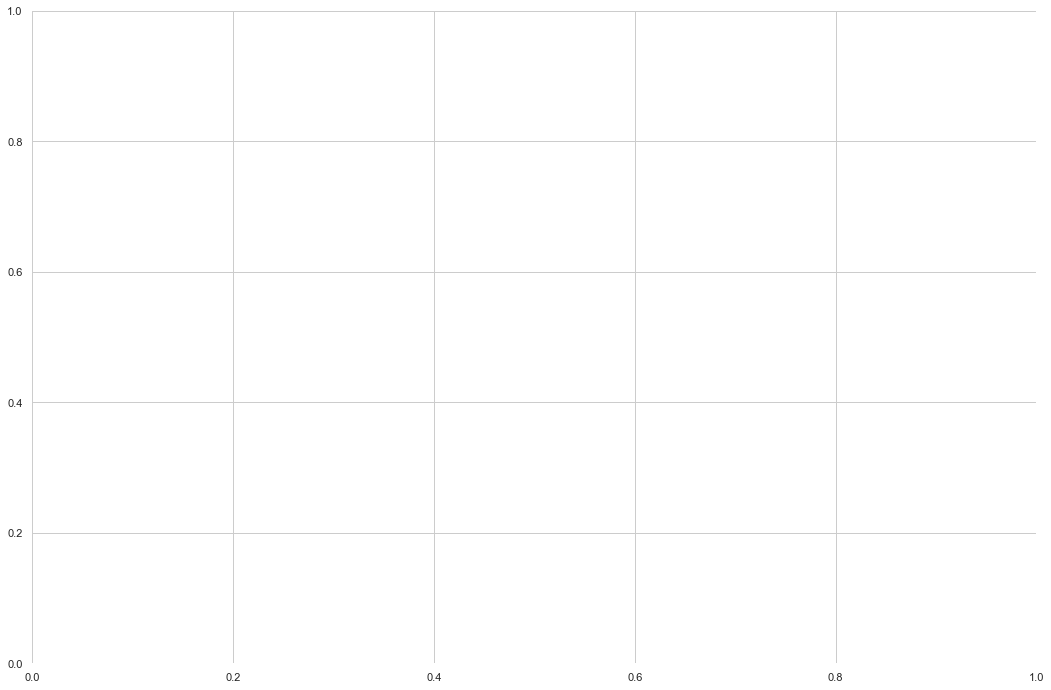

In [59]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="state", y="target_d", data=df, ax=ax)